In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!git clone https://github.com/amiratag/DataShapley.git

Cloning into 'DataShapley'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 79 (delta 0), reused 2 (delta 0), pack-reused 76
Unpacking objects: 100% (79/79), done.


In [ ]:
import os
os.chdir("DataShapley")

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from Shapley import ShapNN
from DShap import DShap
from shap_utils import *
%matplotlib inline
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df = pd.read_csv('/gdrive/My Drive/CICIDS2017/dataset/cicids2017_merge.csv')

In [ ]:
df.columns[~(df != 0).any(axis=0)]
df = df.loc[:, (df != 0).any(axis=0)]
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
len(df.columns.values)

71

In [ ]:
# df = df[['Bwd Packet Length Min', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets','Fwd Packet Length Mean',
#          'Bwd Packet Length Std', 'Flow IAT Mean', 'Fwd IAT Min', 'Fwd IAT Mean',
#          'Flow Duration', 'Flow IAT Std', 'Active Min', 'Active Mean',
#          'Bwd IAT Min', 'Init_Win_bytes_forward', 
#          'ACK Flag Count', 'SYN Flag Count', 'Init_Win_bytes_backward',
#          'PSH Flag Count', 'Average Packet Size',
#     'Label']]
df = df[0:100000]
# df = df [['Subflow Fwd Bytes', 
#          'Bwd Packet Length Std',
#          'Flow Duration', 'Fwd IAT Mean','Init_Win_bytes_forward',
          
#     'Label']]
# df = df [['Subflow Fwd Bytes', 
#          'Bwd Packet Length Std',
#     'Label']]

#select feautures

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
seed = 1
train_set, test_set = train_test_split(df, test_size=0.3, random_state=seed)
train_X = train_set.drop('Label', axis=1)
train_y = train_set[['Label']]
test_X = test_set.drop('Label', axis=1)
test_y = test_set[['Label']]

Scaler = StandardScaler()
train_X = Scaler.fit_transform(train_X)
test_X = Scaler.transform(test_X)

encode = LabelEncoder()
test_y = encode.fit_transform(test_y)
train_y = encode.fit_transform(train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=666)
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=666,
                       verbose=0, warm_start=False)

In [ ]:
model.feature_importances_

array([2.78812139e-02, 9.05132362e-05, 2.09732185e-02, 1.55313055e-02,
       5.81078277e-02, 3.90555176e-03, 9.34858178e-02, 1.05609762e-04,
       1.15180170e-01, 8.66020578e-03, 6.24992783e-04, 1.18911201e-02,
       2.71930337e-02, 2.25014682e-02, 2.33311468e-04, 3.98368536e-03,
       1.70316796e-04, 8.29542717e-04, 1.45388376e-04, 1.67273686e-04,
       2.49274612e-02, 1.20698685e-02, 1.77361541e-02, 2.58311269e-02,
       2.39229271e-03, 3.75818362e-05, 4.68831627e-03, 4.24414769e-06,
       1.11261731e-03, 5.15745715e-03, 2.06534089e-06, 0.00000000e+00,
       4.81743256e-02, 2.57533443e-02, 8.65961992e-04, 1.61386697e-04,
       1.08193435e-03, 1.42398783e-03, 1.33460039e-02, 6.67940754e-03,
       6.55739810e-03, 7.30140073e-06, 3.52636965e-06, 0.00000000e+00,
       4.79756011e-06, 5.98385233e-05, 5.25424412e-05, 0.00000000e+00,
       0.00000000e+00, 3.55466923e-03, 2.81943734e-02, 6.90098523e-02,
       1.75023935e-02, 2.35978278e-02, 3.74316367e-02, 3.56460223e-02,
      

In [ ]:
import pandas as pd
forest_importances = pd.Series(model.feature_importances_, index=df.columns.values[:-1])

In [ ]:
forest_importances

Destination Port               0.027881
Flow Duration                  0.000091
Total Fwd Packets              0.020973
Total Backward Packets         0.015531
Total Length of Fwd Packets    0.058108
                                 ...   
Active Min                     0.000011
Idle Mean                      0.000024
Idle Std                       0.000012
Idle Max                       0.000013
Idle Min                       0.000010
Length: 70, dtype: float64

In [ ]:
forest_importances = forest_importances.sort_values(ascending=False)[:10]

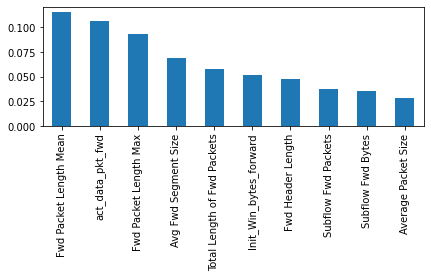

In [ ]:
fig, ax = plt.subplots()

forest_importances.plot.bar(ax=ax)
fig.tight_layout()
plt.show()

In [ ]:
list(forest_importances.index)

['Fwd Packet Length Mean',
 'act_data_pkt_fwd',
 'Fwd Packet Length Max',
 'Avg Fwd Segment Size',
 'Total Length of Fwd Packets',
 'Init_Win_bytes_forward',
 'Fwd Header Length',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Average Packet Size']

In [ ]:
selected_features = list(forest_importances.index)+['Label']

In [ ]:
selected_features

['Fwd Packet Length Mean',
 'act_data_pkt_fwd',
 'Fwd Packet Length Max',
 'Avg Fwd Segment Size',
 'Total Length of Fwd Packets',
 'Init_Win_bytes_forward',
 'Fwd Header Length',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Average Packet Size',
 'Label']

In [ ]:
df = df[selected_features]

In [ ]:
df

,Fwd Packet Length Mean,act_data_pkt_fwd,Fwd Packet Length Max,Avg Fwd Segment Size,Total Length of Fwd Packets,Init_Win_bytes_forward,Fwd Header Length,Subflow Fwd Packets,Subflow Fwd Bytes,Average Packet Size,Label
0,6.0,1,6,6.0,12,33,40,2,12,9.0,BENIGN
1,6.0,0,6,6.0,6,29,20,1,6,9.0,BENIGN
2,6.0,0,6,6.0,6,29,20,1,6,9.0,BENIGN
3,6.0,0,6,6.0,6,31,20,1,6,9.0,BENIGN
4,6.0,1,6,6.0,12,32,40,2,12,9.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...
100011,6.0,4,6,6.0,30,256,100,5,30,7.2,DDoS
100012,6.0,3,6,6.0,24,256,80,4,24,7.5,DDoS
100013,6.0,4,6,6.0,30,256,100,5,30,7.2,DDoS
100014,6.0,3,6,6.0,24,256,80,4,24,7.5,DDoS


#data shapley

In [ ]:
df = df[[['Fwd Packet Length Mean',
 'act_data_pkt_fwd',
 'Fwd Packet Length Max',
 'Avg Fwd Segment Size',
 'Total Length of Fwd Packets',
 'Init_Win_bytes_forward',
 'Fwd Header Length',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Average Packet Size',
 'Label']]]

In [ ]:
dfb = df[df['Label'] == 'BENIGN']
dfd = df[df['Label'] == 'DDoS']

In [ ]:
len(dfb)

38791

In [ ]:
df = dfb[:5000].append(dfd[:5000])

In [ ]:
df

,Fwd Packet Length Mean,act_data_pkt_fwd,Fwd Packet Length Max,Avg Fwd Segment Size,Total Length of Fwd Packets,Init_Win_bytes_forward,Fwd Header Length,Subflow Fwd Packets,Subflow Fwd Bytes,Average Packet Size,Label
0,6.000000,1,6,6.000000,12,33,40,2,12,9.000000,BENIGN
1,6.000000,0,6,6.000000,6,29,20,1,6,9.000000,BENIGN
2,6.000000,0,6,6.000000,6,29,20,1,6,9.000000,BENIGN
3,6.000000,0,6,6.000000,6,31,20,1,6,9.000000,BENIGN
4,6.000000,1,6,6.000000,12,32,40,2,12,9.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...
25106,8.666667,2,20,8.666667,26,8192,72,3,26,1454.125000,DDoS
25107,8.666667,2,20,8.666667,26,8192,72,3,26,1661.857143,DDoS
25108,8.666667,2,20,8.666667,26,8192,72,3,26,1454.125000,DDoS
25109,8.666667,2,20,8.666667,26,8192,72,3,26,1454.125000,DDoS


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed = 1
train_set, test_set = train_test_split(df, test_size=0.3, random_state=seed)
train_X = train_set.drop('Label', axis=1)
train_y = train_set[['Label']]
test_X = test_set.drop('Label', axis=1)
test_y = test_set[['Label']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()
train_X = Scaler.fit_transform(train_X)
test_X = Scaler.transform(test_X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()

In [ ]:
test_y = encode.fit_transform(test_y)
train_y = encode.fit_transform(train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import sklearn.ensemble
import random

In [ ]:
wrate = 0.4

In [ ]:
len(train_y)

7000

In [ ]:
random.seed(seed)
for i in random.sample(list(np.arange(0,len(train_y))), int(len(train_y) * wrate)):
  train_y[i] = abs(train_y[i] - 1)

In [ ]:
X, y = train_X, train_y
X_test, y_test = test_X, test_y
model = 'RandomForest'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(21000, err=0.1, loo_run=True, g_run=True)


Starting LOO score calculations!
LOO values calculated!


KeyboardInterrupt: ignored

In [ ]:
dshap.merge_results()

./temp/mem_tmc_0000.pkl


In [ ]:
dshap.vals_tmc

In [ ]:
len(dshap.vals_tmc)

In [ ]:
dshap.performance_plots([ dshap.vals_loo], num_plot_markers=200,sources=None)

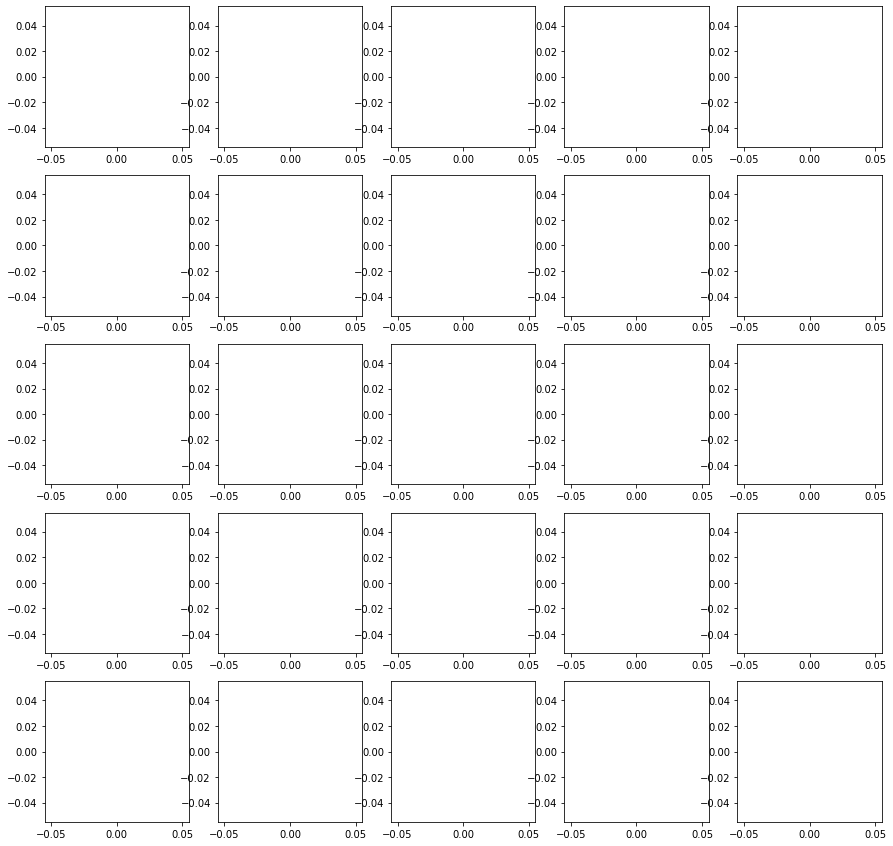

In [ ]:
convergence_plots(dshap.marginals_tmc)